# Analysis of the winter barley data (all stations)

In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
cwd =os.getcwd()
p_cwd = Path(cwd).parent.absolute()
df = pd.read_csv(os.path.join(p_cwd, "data","barley_data","winterbarley.csv"))

In [3]:
df.head()

,s_id,lon,lat,alt,phase_id,year,day_year
0,618,10.73330,52.7333,85,2,1951,65
1,2865,8.73333,49.3000,170,2,1951,71
2,1810,8.93333,49.9667,130,2,1951,79
3,3414,11.36670,47.9000,670,2,1951,79
4,1416,7.30000,51.9667,110,2,1951,82


In [4]:
df.dtypes

s_id          int64
lon         float64
lat         float64
alt           int64
phase_id      int64
year          int64
day_year      int64
dtype: object

In [5]:
df['s_id']=df['s_id'].astype("category")

In [6]:
df['phase_id']=df['phase_id'].astype("category")

In [7]:
df['phase_id'].unique().tolist()

[2, 3, 0, 1, 5, 4]

In [8]:
df.dtypes

s_id        category
lon          float64
lat          float64
alt            int64
phase_id    category
year           int64
day_year       int64
dtype: object

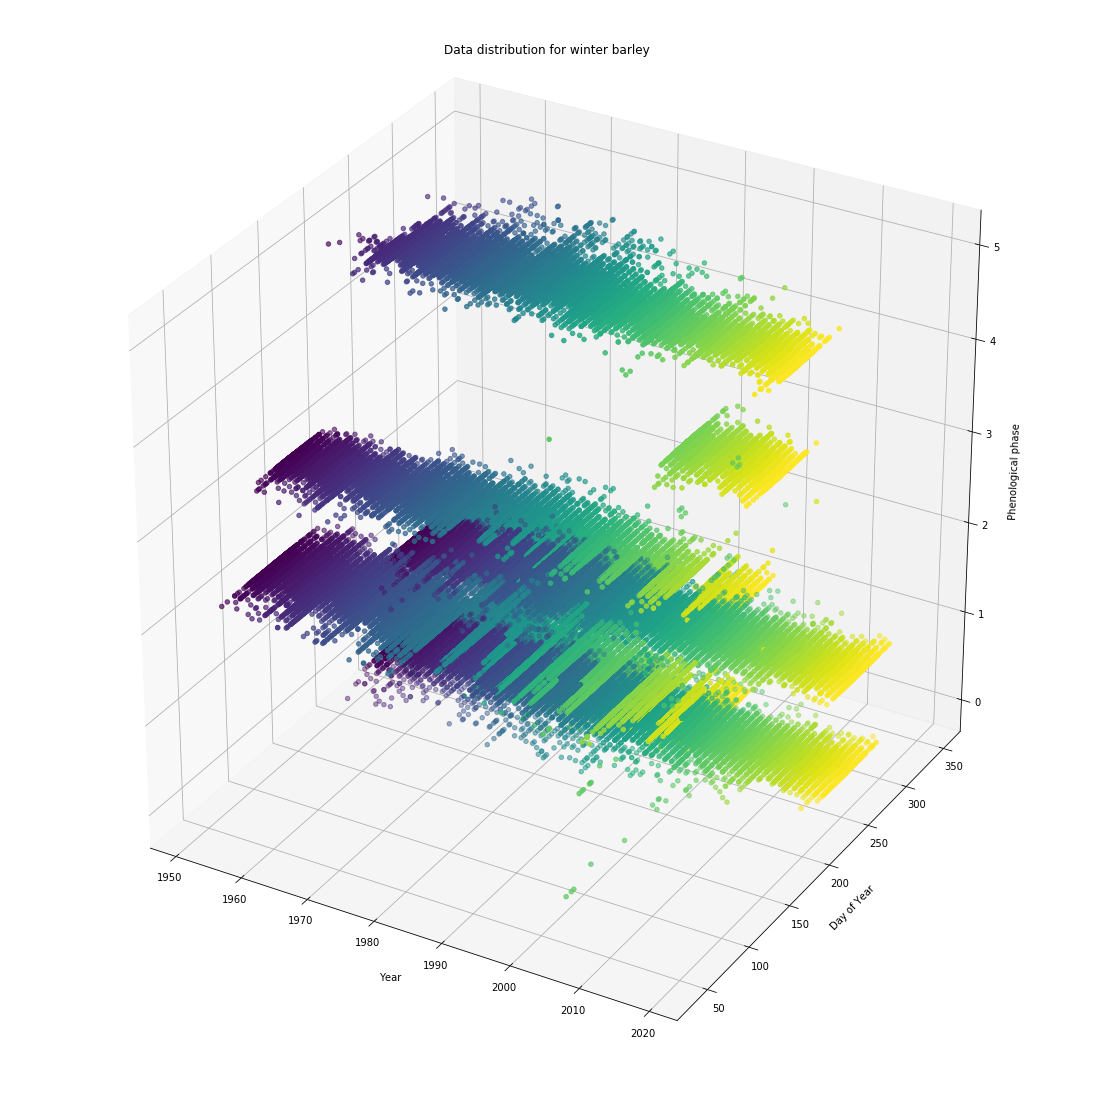

In [9]:
# 3D-Scatterplot


fig = plt.figure(figsize=(15,15))
ax=Axes3D(fig)


xs = df['year']
ys = df['day_year']
zs =df['phase_id']
ax.scatter(xs, ys, zs, c=df['year'])
ax.set_xlabel('Year', labelpad=10)
ax.set_ylabel('Day of Year', labelpad=10)
ax.set_zlabel('Phenological phase', labelpad=10)

plt.title("Data distribution for winter barley", pad=40)
plt.show()

In [10]:
fig.savefig(os.path.join(p_cwd, "output","images","winterbarley_plot.jpg"), dpi=300,
        orientation='portrait')

In [11]:
columns = df.columns.tolist()
columns

['s_id', 'lon', 'lat', 'alt', 'phase_id', 'year', 'day_year']

In [12]:
r_col = ['s_id', 'year','phase_id', 'day_year', 'lon', 'lat', 'alt'] #shifting the columns order

In [13]:
df = df[r_col]

In [14]:
df

,s_id,year,phase_id,day_year,lon,lat,alt
0,618,1951,2,65,10.73330,52.7333,85
1,2865,1951,2,71,8.73333,49.3000,170
2,1810,1951,2,79,8.93333,49.9667,130
3,3414,1951,2,79,11.36670,47.9000,670
4,1416,1951,2,82,7.30000,51.9667,110
...,...,...,...,...,...,...,...
400726,2692,1963,0,241,9.30000,48.7333,240
400727,2601,1963,0,242,8.21667,49.1500,130
400728,3950,1963,0,242,10.95000,49.3667,380
400729,1150,1963,5,244,7.06667,51.2333,220


## Analysis of the harvest phenological data (phase:100(5))

In [15]:
df_harvest = df[df['phase_id']==5]

In [16]:
df_harvest.drop(['phase_id'], axis=1, inplace=True)

/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
df_harvest.head()

,s_id,year,day_year,lon,lat,alt
3129,1802,1952,183,8.56667,49.8000,90
5342,1802,1953,188,8.56667,49.8000,90
9133,2751,1988,162,9.13333,49.0000,200
9140,2293,1988,165,7.18333,50.6000,110
9146,808,1988,168,9.48333,53.5167,25


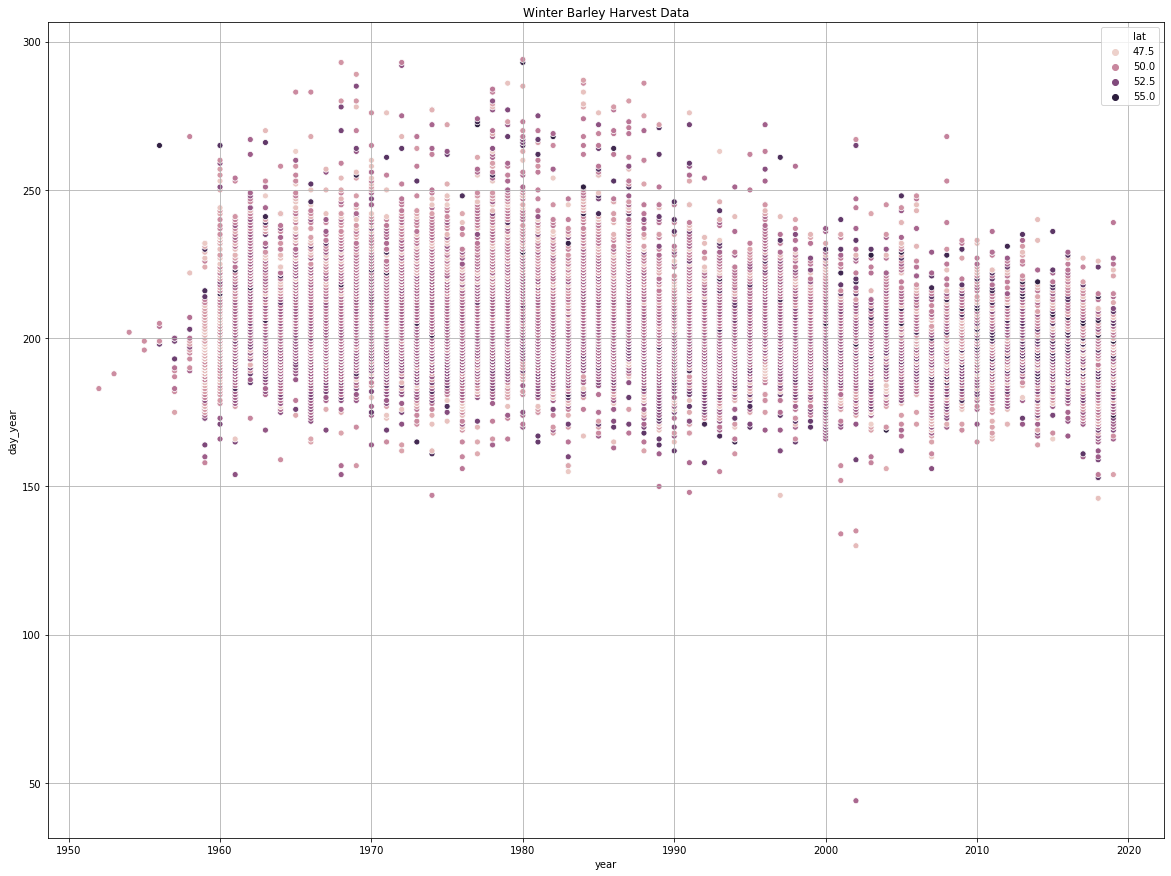

In [18]:
fig = plt.figure(figsize=(20,15))
plt.title("Winter Barley Harvest Data")
plt.grid()
sns.scatterplot(x=df_harvest['year'],y=df_harvest['day_year'], hue=df['lat']);

In [44]:
fig.savefig(os.path.join(p_cwd, "output","images","winterbarley_harvest.jpg"), dpi=300,
        orientation='portrait')

In [19]:
X=df_harvest.drop(['s_id','day_year'], axis=1)
X=np.array(X)
X

array([[1952.     ,    8.56667,   49.8    ,   90.     ],
       [1953.     ,    8.56667,   49.8    ,   90.     ],
       [1988.     ,    9.13333,   49.     ,  200.     ],
       ...,
       [1963.     ,   12.2667 ,   49.2    ,  350.     ],
       [1963.     ,    9.21667,   54.35   ,   10.     ],
       [1963.     ,    7.06667,   51.2333 ,  220.     ]])

In [20]:
y=np.array(df_harvest['day_year'])
y

array([183, 188, 162, ..., 240, 241, 244])

In [21]:
regr = LinearRegression().fit(X, y)

In [22]:
round(regr.score(X,y),3)

0.24

In [23]:
regr.coef_.round(3)

array([-0.238, -1.232,  3.643,  0.047])

In [24]:
mu = np.mean(y)
mu

199.94944851918217

In [25]:
sample=df_harvest[df_harvest['year']>=2000]['day_year'].to_list()
sample_mean=np.mean(np.array(sample))
sample_mean

193.2464010134746

In [26]:
sample_sd = np.std(np.array(sample))
sample_sd 

10.17632367968557

In [27]:
sigma = np.std(y)
sigma

12.067230521400177

In [28]:
z_stat = (sample_mean-mu)/(sigma/np.sqrt(np.size(np.array(sample))))

In [29]:
z_stat 

-73.20059084055795

Significant at alpha=0.1 https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_hypothesistest-means-proportions/bs704_hypothesistest-means-proportions3.html

## Creating a time series with the data and extracting the trend

In [30]:
df_comp= pd.DataFrame(df_harvest.groupby(by=['year']).agg({'day_year': ['mean','median']}))

In [31]:
df_comp.columns

MultiIndex([('day_year',   'mean'),
            ('day_year', 'median')],
           )

/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/seaborn/relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/seaborn/relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/seaborn/relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/Users/gi

Text(0.5, 1.0, 'Mean and Median of the First Day of Harvest')

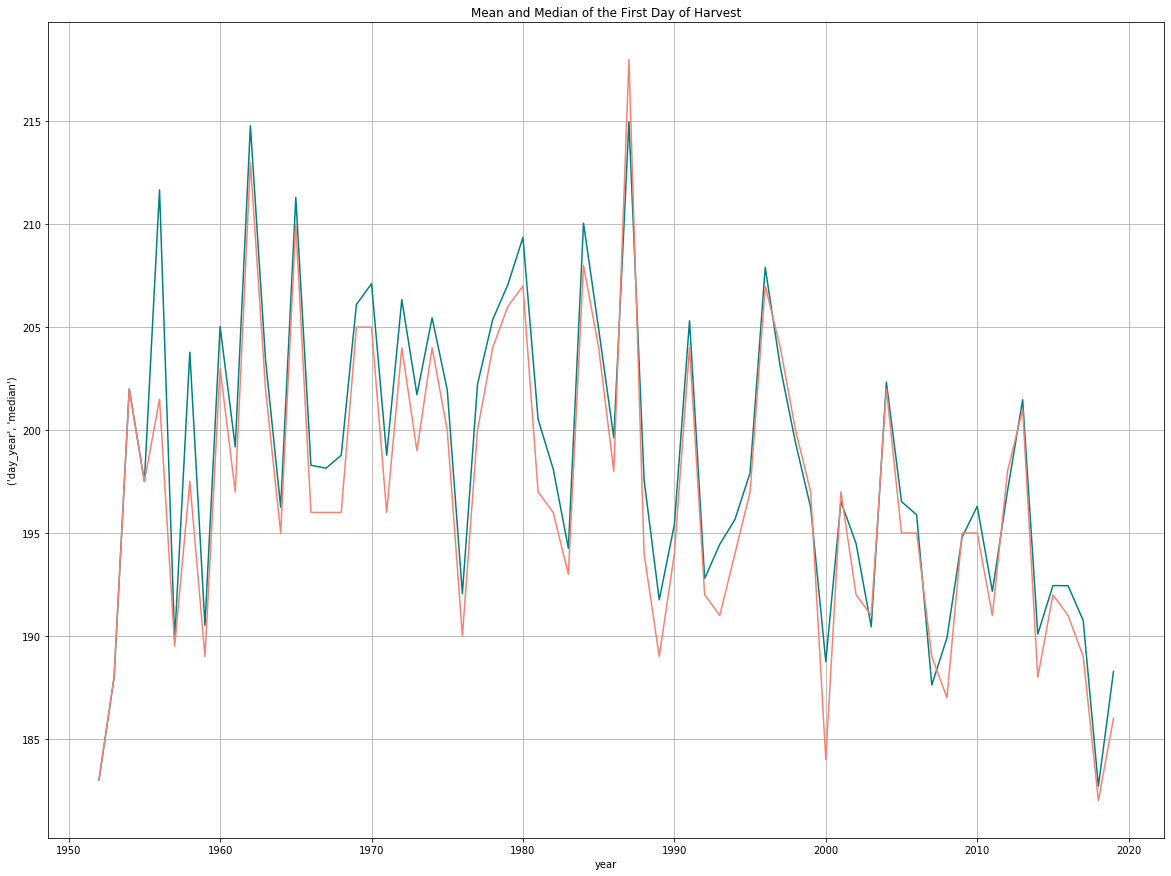

In [34]:
plt.figure(figsize=(20,15))
plt.grid()
sns.lineplot(x=df_comp.index,y=df_comp[('day_year',   'mean')], c='teal')
sns.lineplot(x=df_comp.index,y=df_comp[('day_year',   'median')], c='salmon')
plt.title("Mean and Median of the First Day of Harvest")

In [37]:
df_ts = df_comp.drop([('day_year',   'mean')], axis=1)

In [38]:
df_ts

,day_year
,median
year,
1952,183.0
1953,188.0
1954,202.0
1955,197.5
1956,201.5
...,...
2015,192.0
2016,191.0


In [39]:
df_ts['rolling']=df_ts[('day_year', 'median')].rolling(10).mean()

In [40]:
df_ts

,day_year,rolling
,median,
year,,
1952,183.0,NaN
1953,188.0,NaN
1954,202.0,NaN
1955,197.5,NaN
1956,201.5,NaN
...,...,...
2015,192.0,193.1
2016,191.0,192.7


/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/seaborn/relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/seaborn/relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/seaborn/relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/Users/gi

Text(0.5, 1.0, 'Time Series of the First Day of Harvest')

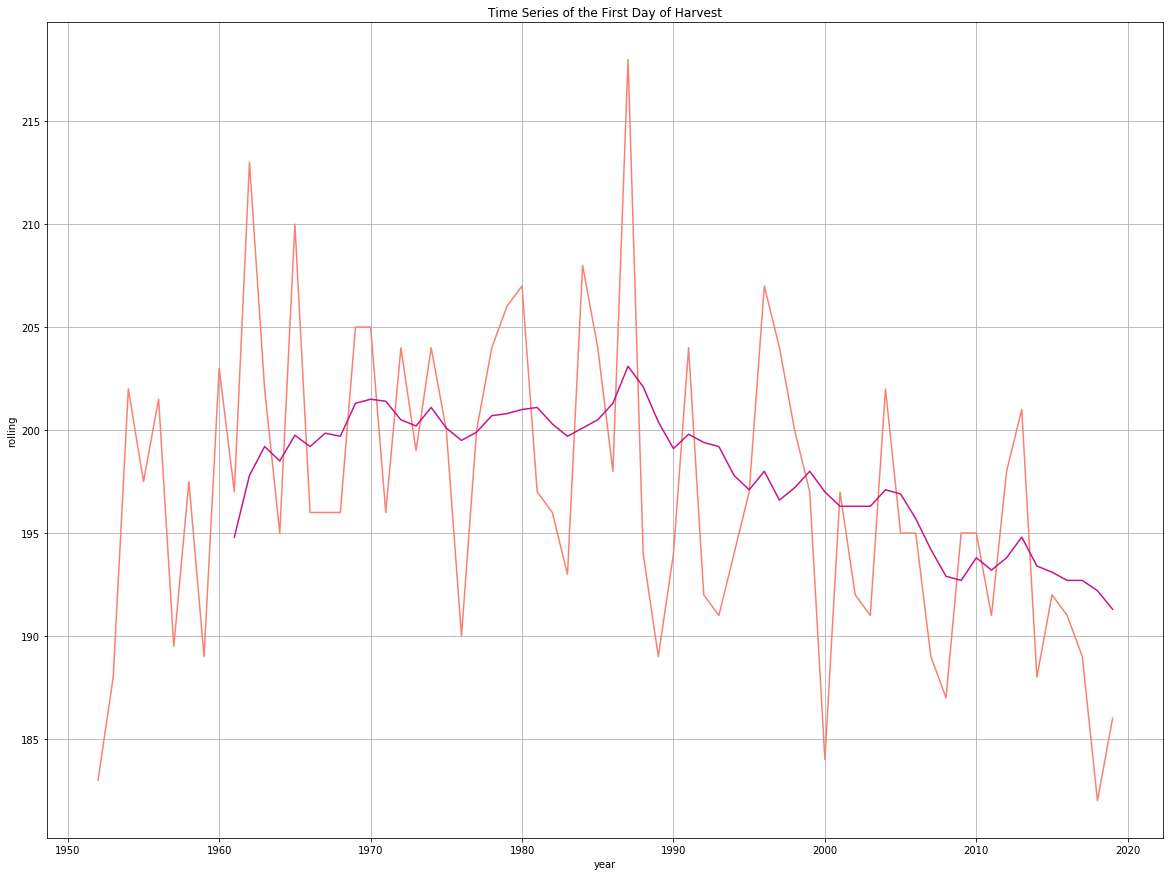

In [43]:
plt.figure(figsize=(20,15))
plt.grid()
sns.lineplot(x=df_ts.index,y=df_ts[('day_year',   'median')], c='salmon')
sns.lineplot(x=df_ts.index,y=df_ts['rolling'], c= 'mediumvioletred')
plt.title("Time Series of the First Day of Harvest")